In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
df = pd.read_csv('jordan.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            120 non-null    int64  
 1   Planted Area    120 non-null    float64
 2   Harvested Area  120 non-null    float64
 3   Temp_mean       120 non-null    float64
 4   Temp_min        120 non-null    float64
 5   Temp_max        120 non-null    float64
 6   Precipitation   120 non-null    float64
 7   Average Yield   120 non-null    float64
 8   crop            120 non-null    object 
 9   Production      120 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.5+ KB


In [4]:
'''# One-Hot Encode categorical features (if any)
categorical_features = [col for col in df if df[col].dtype == object]
for col in categorical_features:
    df = pd.get_dummies(df, columns=[col])'''

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            120 non-null    int64  
 1   Planted Area    120 non-null    float64
 2   Harvested Area  120 non-null    float64
 3   Temp_mean       120 non-null    float64
 4   Temp_min        120 non-null    float64
 5   Temp_max        120 non-null    float64
 6   Precipitation   120 non-null    float64
 7   Average Yield   120 non-null    float64
 8   Production      120 non-null    float64
 9   crop_Barley     120 non-null    bool   
 10  crop_Chickpea   120 non-null    bool   
 11  crop_Lentil     120 non-null    bool   
 12  crop_Vetch      120 non-null    bool   
 13  crop_Wheat      120 non-null    bool   
dtypes: bool(5), float64(8), int64(1)
memory usage: 9.2 KB


In [7]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13]].values  #features
y = df.iloc[:,8].values  # Target variable

In [8]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_transformed = pt.fit_transform(X)
Y_log = np.log(y + 1)

In [34]:
X_transformed

array([[-1.24627847e+00,  1.09102324e+00,  1.12377952e+00,
        -4.46874581e-01, -1.24900090e-16, -1.52655666e-16,
         4.87754170e-01, -1.18353584e-01, -4.87950036e-01,
        -4.87950036e-01, -4.87950036e-01, -5.47722558e-01,
         2.04939015e+00],
       [-6.00718228e-01,  1.09102324e+00,  1.12377952e+00,
        -4.46874581e-01, -1.24900090e-16, -1.52655666e-16,
         4.87754170e-01, -1.18353584e-01, -4.87950036e-01,
        -4.87950036e-01, -4.87950036e-01, -5.47722558e-01,
         2.04939015e+00],
       [ 5.97952367e-02,  1.09102324e+00,  1.12377952e+00,
        -4.46874581e-01, -1.24900090e-16, -1.52655666e-16,
         4.87754170e-01, -1.18353584e-01, -4.87950036e-01,
        -4.87950036e-01, -4.87950036e-01, -5.47722558e-01,
         2.04939015e+00],
       [ 7.35600640e-01,  1.09102324e+00,  1.12377952e+00,
        -4.46874581e-01, -1.24900090e-16, -1.52655666e-16,
         4.87754170e-01, -1.18353584e-01, -4.87950036e-01,
        -4.87950036e-01, -4.87950036e

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [10]:
'''#Check for and handle categorical variables
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values'''
 
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=2, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_transformed, Y_log)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=2)

In [11]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X_transformed)

# Evaluating the model
mse = mean_squared_error(Y_log, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(Y_log, predictions)
print(f'R-squared: {r2}')

mae = mean_absolute_error(Y_log, predictions)
print("Mean Absolute Error (MAE):", mae)

Out-of-Bag Score: 0.8536416016793914
Mean Squared Error: 0.01861974426746475
R-squared: 0.9952039561299466
Mean Absolute Error (MAE): 0.10256006000338565


In [12]:
import math
print(math.sqrt(mse))

0.13645418376680413


Mean Absolute Percentage Error: 1.4417567361488615


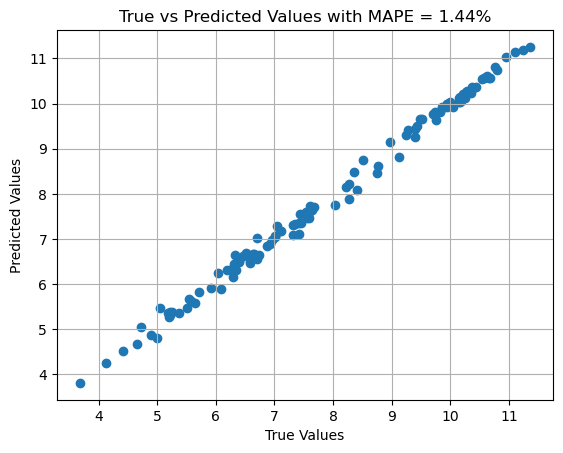

In [13]:
import numpy as np
import matplotlib.pyplot as plt
def mean_absolute_percentage_error(y_test, y_pred):
  """Calculates the Mean Absolute Percentage Error (MAPE)"""
  y_test, y_pred = np.array(y_test), np.array(y_pred)
  return np.mean(np.abs((Y_log-predictions) / Y_log)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(Y_log, predictions)
print("Mean Absolute Percentage Error:", mape)

# Create scatter plot
plt.scatter(Y_log, predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"True vs Predicted Values with MAPE = {mape:.2f}%")
plt.grid(True)
plt.show()

## PREDICTIONS FOR NEW DATA FROM MOVING AVERAGES

In [14]:
dfp=pd.read_csv('prediction.csv')

In [15]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            26 non-null     int64  
 1   Planted Area    26 non-null     float64
 2   Harvested Area  26 non-null     float64
 3   Temp_mean       26 non-null     float64
 4   Temp_min        26 non-null     float64
 5   Temp_max        26 non-null     float64
 6   Precipitation   26 non-null     float64
 7   Average Yield   26 non-null     float64
 8   crop            26 non-null     object 
dtypes: float64(7), int64(1), object(1)
memory usage: 2.0+ KB


In [30]:
#One-Hot Encode categorical features (if any)
categorical_features = [col for col in dfp if dfp[col].dtype == object]
for col in categorical_features:
    dfp = pd.get_dummies(dfp, columns=[col])

In [36]:
X2 = dfp.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values  #features
pt = PowerTransformer()
X2_transformed = pt.fit_transform(dfp)
#y = dfp.iloc[:,9].values  # Target variable

In [39]:
X2_transformed

array([[-1.24627847e+00,  1.09102324e+00,  1.12377952e+00,
        -4.46874581e-01, -1.24900090e-16, -1.52655666e-16,
         4.87754170e-01, -1.18353584e-01, -4.87950036e-01,
        -4.87950036e-01, -4.87950036e-01, -5.47722558e-01,
         2.04939015e+00],
       [-6.00718228e-01,  1.09102324e+00,  1.12377952e+00,
        -4.46874581e-01, -1.24900090e-16, -1.52655666e-16,
         4.87754170e-01, -1.18353584e-01, -4.87950036e-01,
        -4.87950036e-01, -4.87950036e-01, -5.47722558e-01,
         2.04939015e+00],
       [ 5.97952367e-02,  1.09102324e+00,  1.12377952e+00,
        -4.46874581e-01, -1.24900090e-16, -1.52655666e-16,
         4.87754170e-01, -1.18353584e-01, -4.87950036e-01,
        -4.87950036e-01, -4.87950036e-01, -5.47722558e-01,
         2.04939015e+00],
       [ 7.35600640e-01,  1.09102324e+00,  1.12377952e+00,
        -4.46874581e-01, -1.24900090e-16, -1.52655666e-16,
         4.87754170e-01, -1.18353584e-01, -4.87950036e-01,
        -4.87950036e-01, -4.87950036e

In [24]:
'''label_encoder = LabelEncoder()
x_categorical2 = dfp.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical2 = dfp.select_dtypes(exclude=['object']).values
x2 = pd.concat([pd.DataFrame(x_numerical2), x_categorical2], axis=1).values'''

"label_encoder = LabelEncoder()\nx_categorical2 = dfp.select_dtypes(include=['object']).apply(label_encoder.fit_transform)\nx_numerical2 = dfp.select_dtypes(exclude=['object']).values\nx2 = pd.concat([pd.DataFrame(x_numerical2), x_categorical2], axis=1).values"

In [38]:
predictions2 = regressor.predict(X2_transformed)